In [1]:
from IPython.core.display import HTML
HTML("""
<style>

div.text_cell_render h1, h2, h3, h4, h5 { 
font-family: 'Georgia';
}


div.text_cell_render { /* Customize text cells */
font-family: 'Avenir';
font-size:15px;
line-height:18px;
color: #292929;
font-weight:400;
}
</style>
""")

### Lesson Introduction   


- DWS on AWS, Why?  

    
    

- Amazon Redshift Architecture 

- General ETL Concepts  

- ETL for Redshift . 

- Building a Redshift Cluster: Part 1: Logistics   

- Building a Redshit Cluster: Part 2: Infrastructure as Code   

- Optimizing Redshift Table Design 

## Why would we actually implement the Data Warehouse on AWS?  


- This is the conceptual model we have for a data warehouse:  

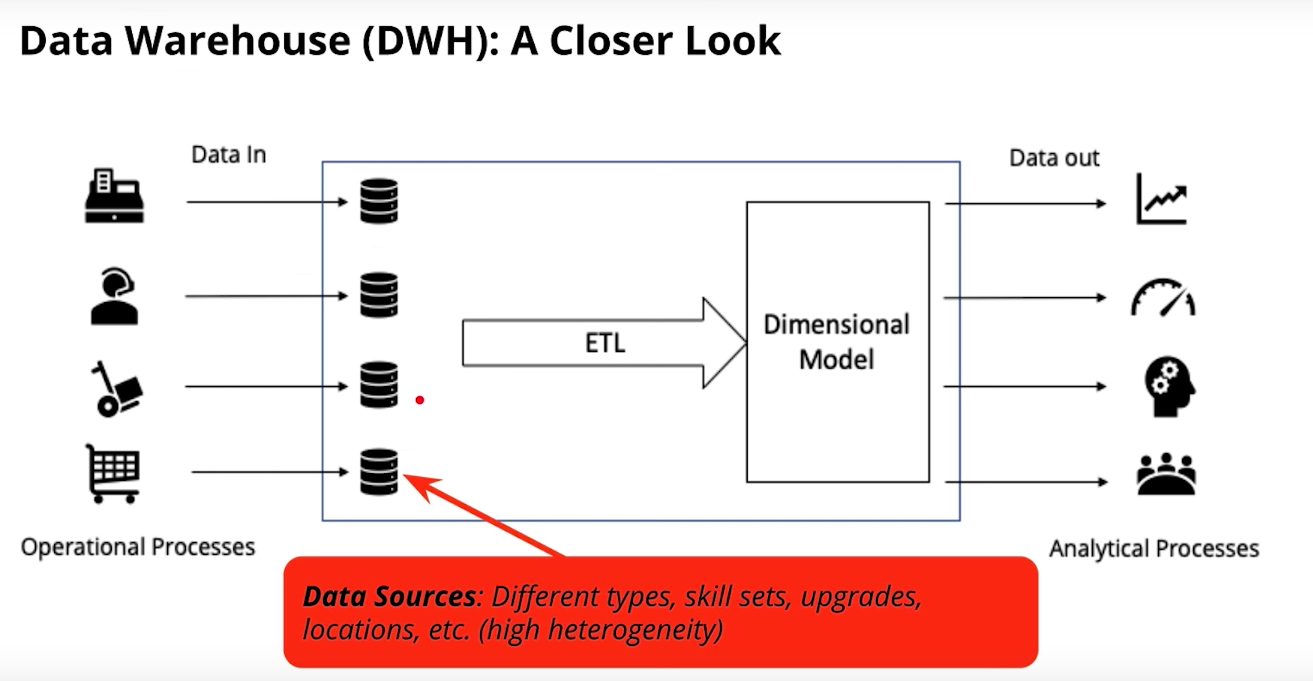  


We have the data sources that are crucial for operations, for OLTP. These are quite heterogenous. Each one of them might need different upgrades, and it might be scattered along the organization in different physical locations.  





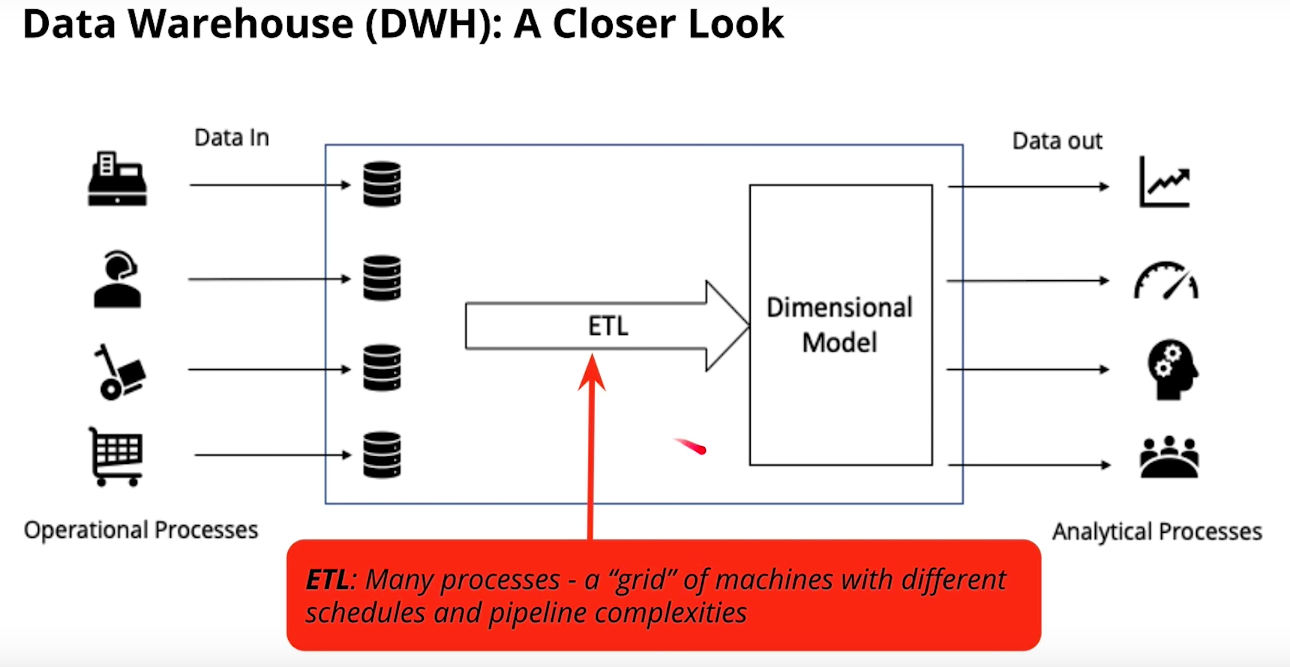

As well we have the ETL. ETL are a set of many processes,  usually a "grid" of machines with different schedules and pipelines complexities.  

These copy the data from the data sources into the dimensional model.  

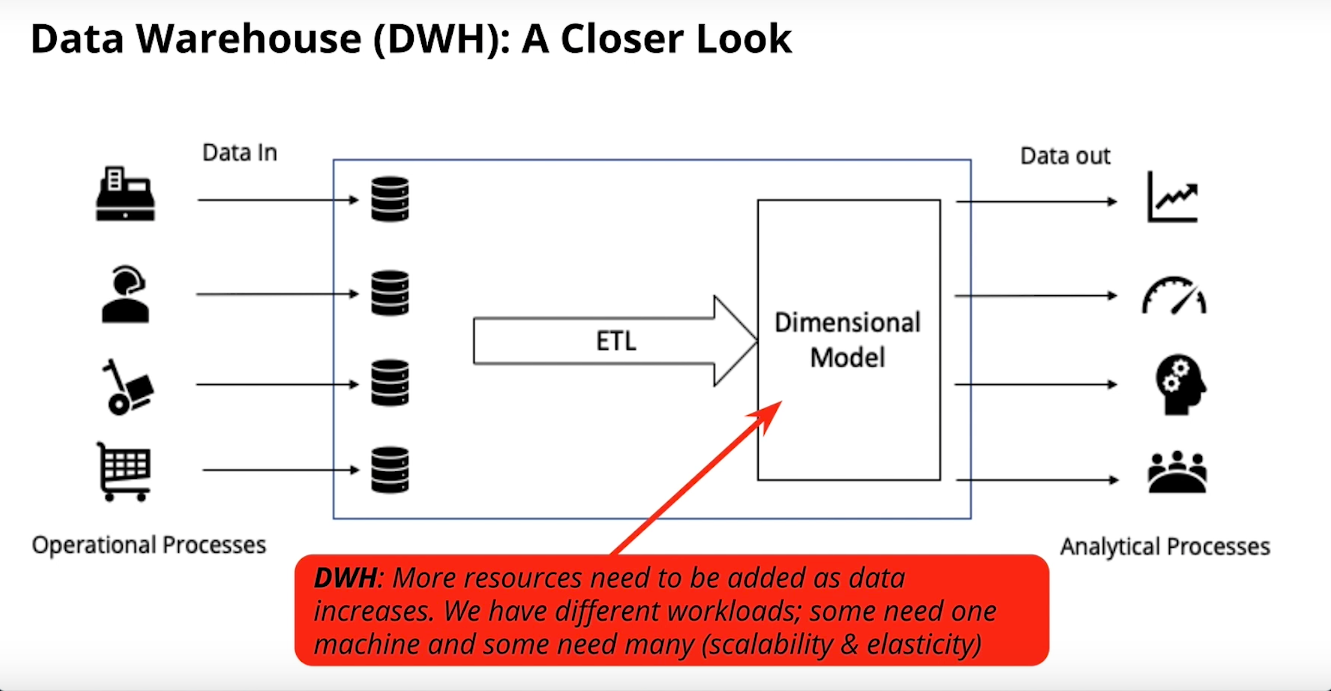 

Then we have the Data Warehouse Storage Part, where basically, it grows over time. In a Data Warehouse, more resources need to be added as data increases. We have different workloads; some need one machine, and some need many (scalability and elasticity).   


## Choices for Implementing a Data Warehouse  

We basically have two options: 
- On Premise
- On Cloud 

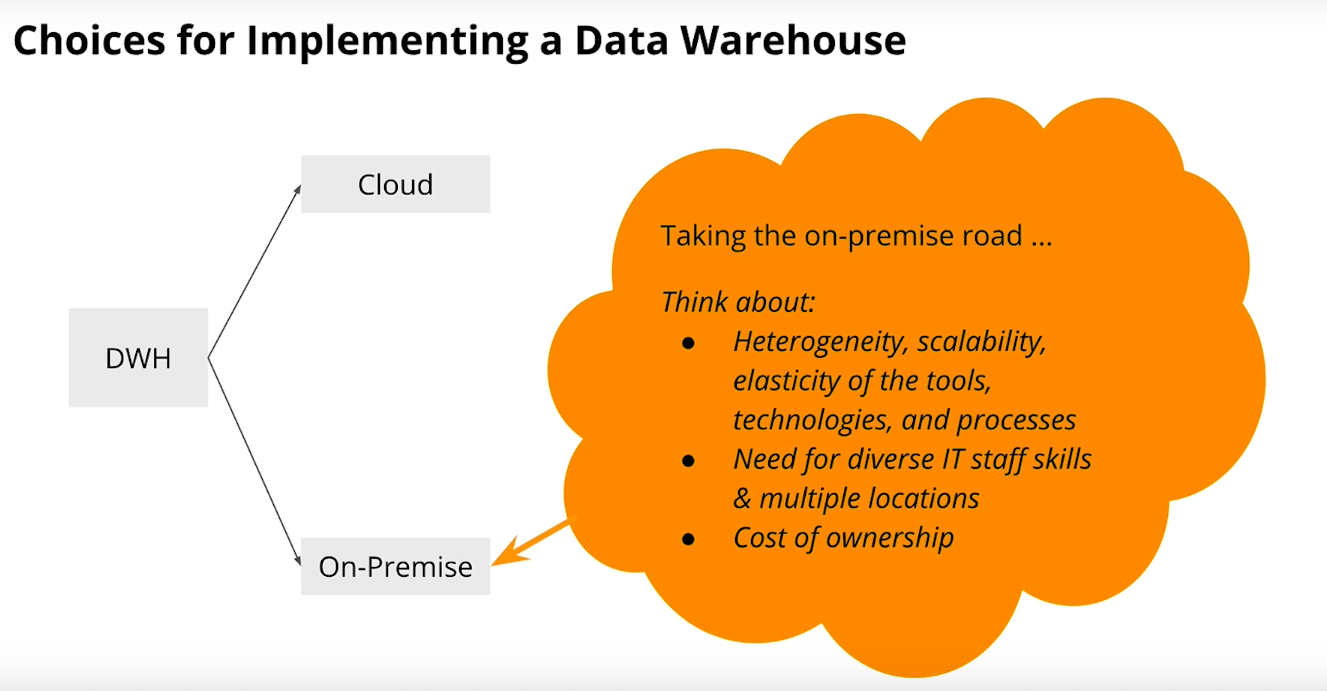  


If we take the on-premise road, we need to think about: 
- Heterogeneity: You may need different data models for different departments.  

- Scalability: You may want to scale to bigger geographic region, or have more data in your pipeline. 

- Elasticity of tools: You may want to grow _or shrink_ the amount of resources you have put 

- You will need diverse IT-staff skills in multiple locations

- You will need to buy the servers. 

### Now, if we use the Cloud:   

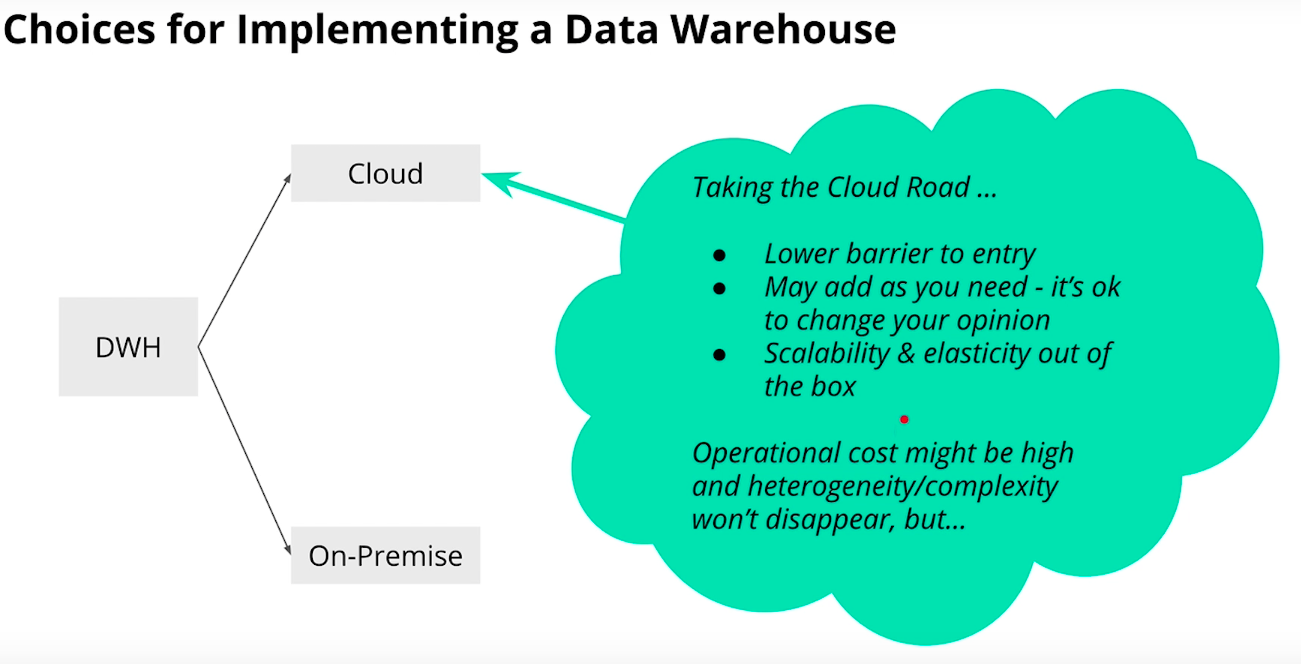 

- You have a lower barrier to entry. 
- You may add as you need, it's OK to change your requirements. 
- You can scale your operations easily. 
- Elasticity comes right out of the box.  


The CON is that: 
- Operational cost might be high, and heterogeneity/complexity won't disappear.  


### What is Amazon EC2? 

- Amazon Elastic Compute Cloud (Amazon EC2) provides scalable computing capacity in the Amazon Web Services cloud.   


- Using Amazon EC2 eliminates your need to invest in hardware up front, so you can develope and delploy applications faster. You can use Amazon EC2 to launch as many or as few virtual servers as you need, configure security and networking, and manage storage.  

- Amazon EC2 enables you to scale up or down to handle changes in requirements or spikes in popularity, reducing your need to forecast traffic.  

### DWH Dimensional Model Storage on AWS 

The storage part of the data warehouse is the consideration of storing the 
- conformed dimensions
- or the data marts 

If we started to focus on the storage part, we have two important paths: 

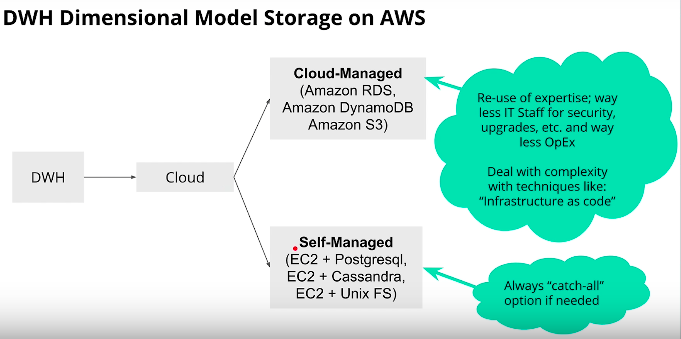  

Either we can go: 
- Cloud Managed or 
- Self Managed 


Cloud Managed will be that we actually resuse the expertise of Amazon.  

Self Managed means that we just get ourself an EC2 machine, and we self-manage it ourself.  

If we go the Cloud Managed way, our operationa expense goes down because most our system administrator and devOps staff becomes less.  

The downside is that we loose a bit of control because things are already pre-configured for us and there might not be room to do, really custom settings.   


But Hey! If we need something custom, we can go to EC2.   

In this lesson, 

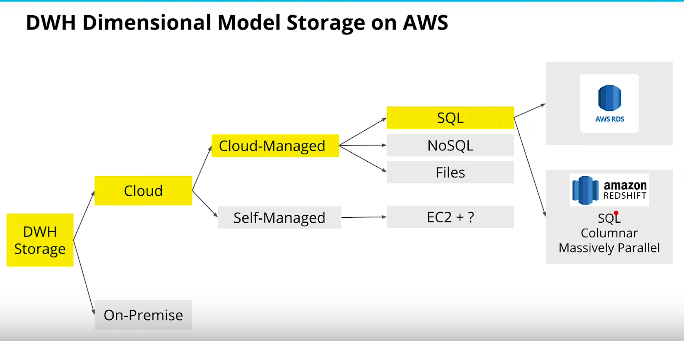 

We are going to SQL way for data warehouse. Within SSQL, we have 2 products from AWS.  

- Amazon Relational Data Stores
- Amazon REDSHIFT   

## Amazon Redshift Technology 

### Column Oriented Storage  
- Best Suited for storing OLAP workloads, summing over a long history. 


- A column-oriented DBMS (or a columnar DBMS) is a database management system that stored data tables by column rather than by row.  

- Practical use of a column store versus a row store dfiferes little in relational DBMS world.   


- Both columnar and row databases can use traditional database query langauges like SQL to load data and perform queries.  


- Both row and columnar databases can become the backbone in a system to serve the data for common extract, transform, load and data visualization tools.  


- However, by storing data in columns, rather than rows, the database can more precisely access the data it needs to answer a query rather than scanning and discarding unwanted data in rows.   



- In the case of OLAP, we do many column aggregations, so it's good that we choose a columnar database. Then, it does not need to depend on other columns. If we had stored the data row wise, we would need to scan each row, and remove the columns that we don't need. 

### Internally PosgreSQL 

- RedShift is postgresSQL with modified extensions for custom, columnar storage.  



Let's understand Amazon Redshift.  

To be able to explain this, we need to explain the concurrency that would happen in normalization databases. 

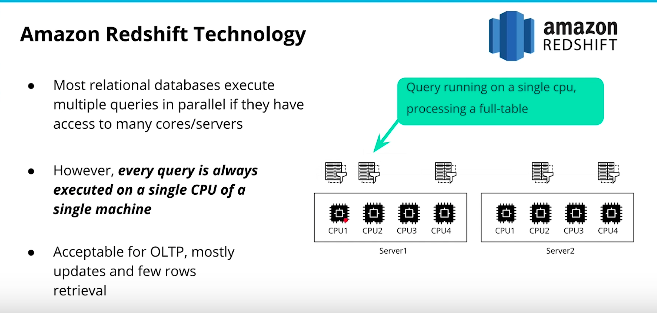

Most relational database execute multiple queries in parallel, if they have access to many cores or servers.     


Naturallly, one can have a database server on one machine, or can have a database cluster.  

If you have a database cluster,you will see that for most of the normal SQL or RDBMS, every qery can have many queries at the same time, BUT, each query actually runs on a single CPU.  

So, if at a point in time, I have one query running, it doesn't matter how many CPUs do I have because I am always going to run it on one CPU.  


However, if I have lots of concurrent users runnning those queries , I can schedule those ones on the other CPUs. This is actually very nice for the OLTP because indeed, we have lots of concurrent users and each query on itself is not that long. It doesn't do anything major.  

But then we have the other species of databases, which is the Massively Parallel Processing databases or MPP databases.    


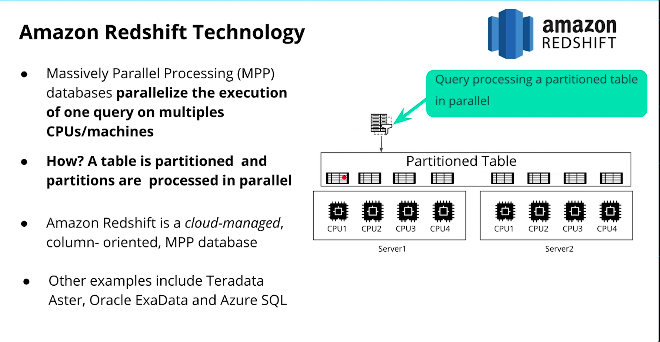

> The idea of the MPP databases is that they parellelize the execution of a single query on multiple on multiple CPUs.  

__How?__   

- In an MPP database, one table would actually be partitioned into smaller partitions, and distributed across those CPUs, where actually each cPU would also have it's associiated storage.  


So, when one query comes, that query can process this whole table in parallel where each CPU would be basically crunching one partition of the data.  


So, Amazon Redshift is: 
- Cloud-Managed 
- Column Oriented 
- Massively Parallel Processing Database 
 
 
It's not the only product on the market which such nice properties. There are other products from other vendors and Redshift if actually the champion of Amazon Web Service.  



## Amazon Redshift Architecture 

Let's take a closer look at the redshift architecture.  

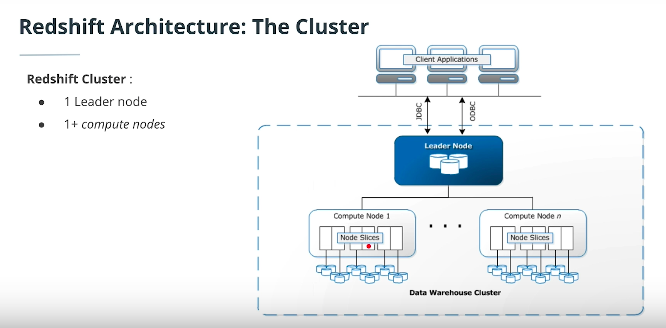

Redshift is actually a cluster. 

A cluster is composed of a leader node and one or more compute nodes.  

Actually, you can start from a single node if you like. 

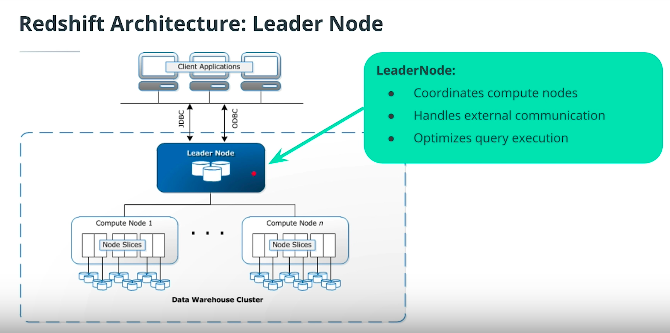

The Leader Node is the node that interacts with the outside world so, all your client applications talk to the leader node using protocols like JDBC and ODBC.   


The Leader Node, under it has a bunch of compute nodes.  

The Leader Node coordinates the work of those compute nodes together.  


The Leader Node handles external communication as well.    

It Optimizes Query Exceution to make sure it is optimized. 


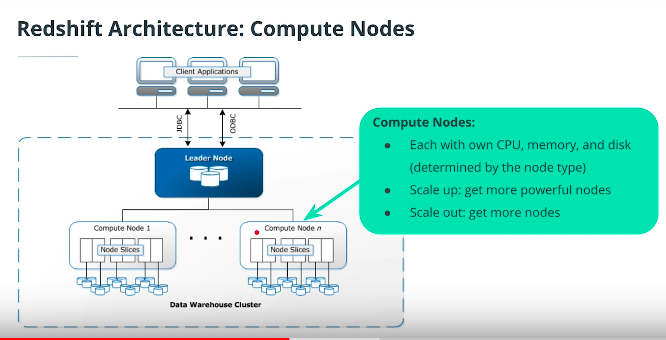

Each of the compute nodes have a CPU, memory and disk. One can actually configure how powerful they want the compute nodes to be.  

Basically, it's upto you to: 

- Scale Up: Don't get much nodes, but extremely powerful ones. 


- Scale Out: Get lots of nodes, which are medium powerful. 

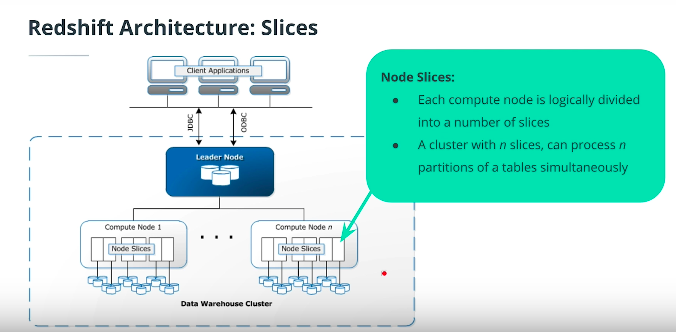

The important dimension is the __Node Slices__: 
- Each compute node is logically divided into a number of slices.  
- A compute node with _n_ slices can process _n_ partitions of tables simultaneously.  

- For simlicity, you can consider a Slice, as a CPU. Each CPU has a bunch of disks dedicated to it's work. 

- So, a compute node with _n_ slices, can process _n_ partitions of tables simultaneously.  

- It does not matter whether these slices are on one machine or many machines. 

### Redshift Architecture Example   


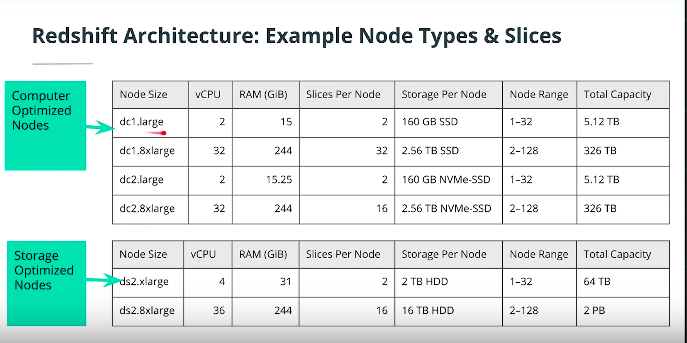


The computer optimized nodes are smaller in capacity, but are fast and powerful. 


- `dc1.large` has 2 CPUs, and 2 slices per node.  It can store 160 GB SSD per node and it's node range is 1-32, that means you can anywhere in between 1 to 32 nodes in a cluster. So, if we can have 32 nodes, each of 160 GB, we can have $32*160 = 5120$ GB or $5.12$ TB of Total Capacity.    


- You can go and get low latency NVMe-SSD disks. <font color='red'>The latency of that is closer to memory.</font> 


The storage optimized nodes are not so fast and powerful in terms of CPU but they are large in capacity. 

- `ds2.xlarge` has 4 vCPU, and it can have 2 slices per node. We can have 2 TB HDD with a node range of 1-32. This gives us a total capacity of $64$TB.  


These instances are rather expensive as compared to the average EC2 that you can find on Amazon.  

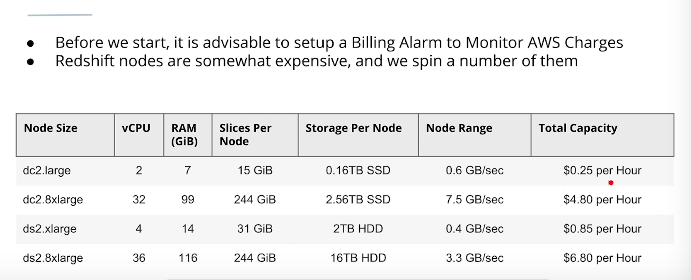


An instance of `dc2.large` is 25 cents per hour. Bottom line is, we are going to use 4 of those `dc2.large` instances.  

Basically, you'll be paying a dollar, per hour.  

You should go to your billing settings, and create an alarm.You ca say that whenever the cost increased by a certain number, send me an email.  

## SQL to SQL ETL 

Let'sget into general ETL concepts before delving into details of ETL associated with RedShift in particular.  

This is the following mental image we have.  

We have the data sources, we want to do ETL.  

We want the built dimension model, and get the data out, and build lots of insights.  


But, let's go a little back and talk basics. 

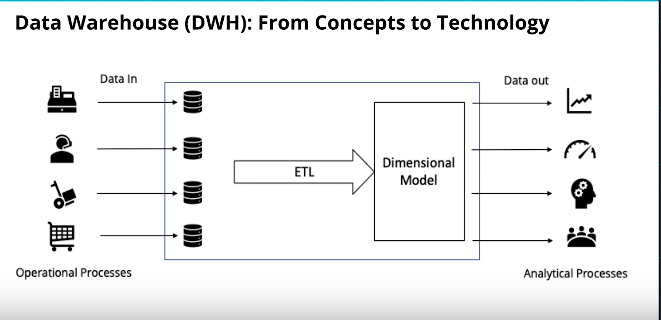

Let's say we have a SQL table. We want to load it into another SQL table after some transformation.    

To copy the results of a query to another table (eg: facts, or dimension table) in the same database, we can easily use `SELECT INTO`.  


```SQL  

SELECT fact1, fact2 
INTO newFactTable
FROM table X, Y
WHERE X.id = Y.fid 
GROUP BY Y.d 
```  

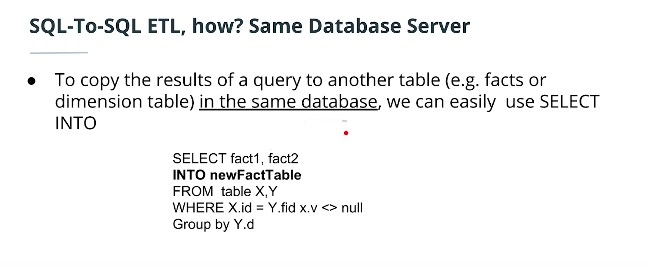

Now, `SELECT INTO` is a good solution when the both the tables, the table we are trying to copy from, and the table we want to copy in, are in the same database. This is kinda the Hello World of Dimensional Modeling.    


Now, what do we do if we want to copy the results of a query to another table on a totally different database server?    


So here, out intention would be to `SELECT` a couple of facts into another `Server.newFactTable`.  

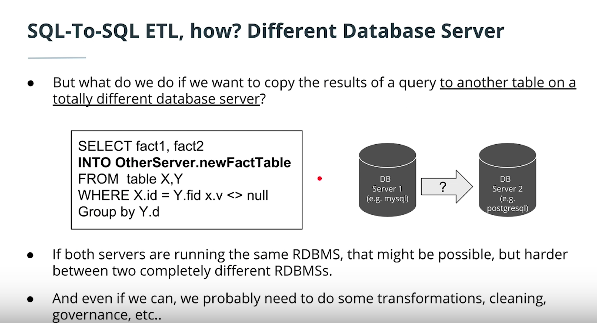

Herein, we wll use the following query: 


```SQL 

SELECT fact1, fact2
INTO OtherServer.newFactTble
FROM table X, Y
WHERE X.id = Y.fid
GROUP BY Y.d 
``` 


This solution will work if both servers were using the same RDBMS. 

__What if they are not using the same RDBMS?__  

- We have agreed that most data source are rather hetrogeneous, and well, is every vendor implement all databases?  That's not very realistic.  
- Actually, when we take the data from one database, into another dataase, we would probably want to do something in the middle. 
- We need a more general solution. 

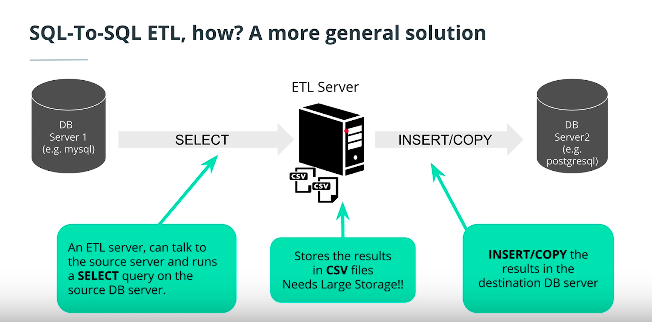

So, a more general solution for this SQL to SQL ETL is that we actually put an ETL server in the middle or many of them having lots of workloads.  

An ETL server, can talk to the source server, and runs a `SELECT` query on the source DB server.  

The ETL server stores the results in CSV files. 

Symmetrically, you would go and insert or copy those ones into the new database server, which is for our example, Postgres. 


Actually, you will need lots of storage in the middle for storing all those CSVs. Therefore, an ETL server talks to different databases, and needs to store data as it moves it from one place to the next. 

#### [What is an Amazon S3 bucket?](https://searchaws.techtarget.com/definition/AWS-bucket)  


An Amazon S3 bucket is a public cloud storage resource available in Amazon Web Services's Simple Storage Service (S3). This an object storage offering.  

Amazon S3 buckets, which are similar to file folders, store object, which consists of data, and it's descriptive metadata. 

### SQL to SQL ETL - AWS Case 

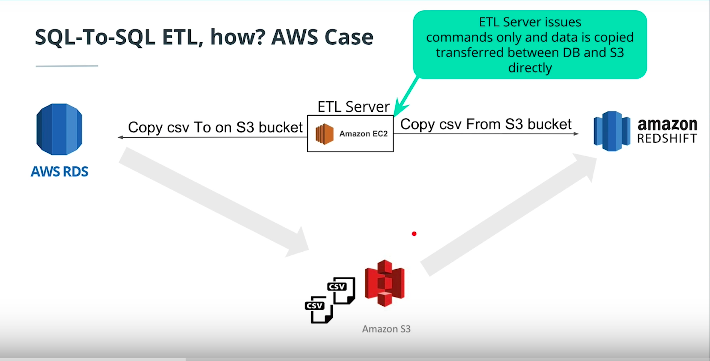

Now, if we try to do an SQL to SQL ETL in the AWS case, we will find that we can go and have an EC2 machine where we have our server. 

This SQL server can copy from one server to another SQL server.  

In the above case, the most common would be that we have a MySQL or Postgres, or any other relational databases in the Amazon RDS.    

We want to copy all data in csvs from the RDS, and dump those CSVs into an Amazon REDSHIFT bucket. 


Now, we have redshift on the other side, and we want to transfer all csvs from the S3 bucket into Redshift. 



__"Would we need to store all CSVs in this EC2 server?__ 

> Well, naturally in the on-premise mode, we might be doing something like that. In the Amazon architecture we have something nice in which we can actually connect to the Amazon RDS and issue a command pointing RDS to a bucket and telling RDS:
- 'Hey, just go and take your stuff from here to this bucket'.   
    
    
    
    
> Similarly, after the data has been copied successfully to S3 bucket, we can go and issue a command to Amazon Redshift saying: 
- 'Hey, Amazon I am going to point you to an S3 bucket and you go and get your stuff.'
    
 
 
With that, actually the ETL server here, we are still interested in the scheduling capabilities of that server but we are not a lot interested in this server  having a lot of storage. This S3 bucket works as a staging are.  



An important question might arise would be, ''But what if you have here, may be an EC2 machine, was a server that does not have this capability?'' Well, at that point, you will actually revert to the initial design of taking the data into the local storage of the ETL server than moving it again to Amazon S3 to do that. But in general, there are many products, most of the products in Amazon, especially the managed services. They all know how to go and talk directly to S3. 

## [Redshift and ETL in context](https://www.youtube.com/watch?v=JQEAYabMr20)

Let;s look at the big picture here.  

#### Data Sources 
First, we have an array of data sources. 
- Normal CSV's that are natively born as files. They are not in a database. 
- Then, we have our managed and unmanaged relational data stores like Cassandra and DynamoDB.  


<font color='red'>1. What is the difference between managed and unmanaged data stores? What is the difference between Cassandra and Amazon DynamicDB? </font>  

#### ETL 

Then, we have an array of ETL machines. Here, we have a class of produces that actually do all the calls. This process involves taking the data from the sources, and into the staging area. They would be issuing the command to redshift to actaully go and pull these files into redshift.   

2. <font color='red'>If one of the sources does not know how to copy things directly into S3, you will have to go through the hassle of the data going to ETL first, locally, and the to staging, then to redshift </font> . 

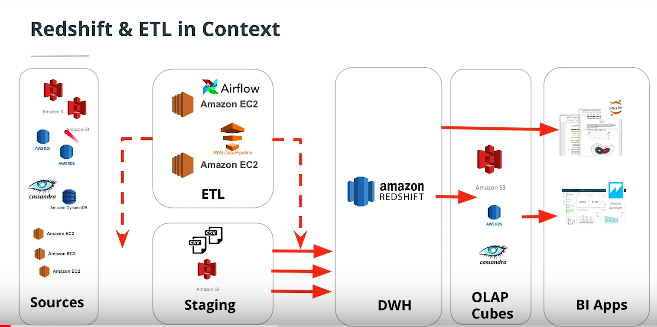

Once the data is into redshift, our main desire here is to be able to connect BI apps with business intelligence apps and visualizations, and so forth.  

However, many times, we are interested in big aggregations that would take a lot of time to compute each time we had them.  

So, what do we do?  



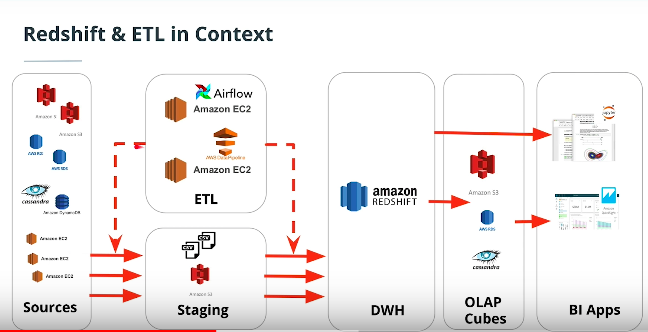



We actuall pre-aggregate those.  


<font color='red'>
3. For example, we can preload OLAP cubes into Amazon S3 files that could be loaded directly. 

We can even put them in columnar storage or relational storage. Its also very trendy to put them into in-memory stores for low latency.  
</font>  

So, after that, we can go to the BI apps. The BI-apps can work directly from Redshift or actually a little bit fast from those pre-aggregated OLAP cubes.  